# Tiro parabolico 

In [8]:
import proyectil
import numpy as np
import matplotlib.pyplot as plt

In [19]:

x_0 = 0
y_0 =0
z_0 = 10000
vx_0 =0
vy_0 =0
vz_0 =0
g_n = 9.81
M_n = 5.972*(10**24)
a_n =0.05
c_n =0.001
m_n = 100
t_0 = 0
t_f = 35
nn = 1000

omega_n = 2*np.pi/(3600*24)
R_n = 6.371*10**3
labbda_n = 1.396


t = np.linspace(0,10,100)
sol = proyectil.proyectil_ideal(x_0,y_0,z_0,vx_0,vy_0,vz_0,g_n,np.linspace(t_0,t_f,nn))
x_ideal = sol[1]
y_ideal = sol[2]
z_ideal = sol[3]

sol2 = proyectil.proyectil_friccion(x0 = x_0, y0 = y_0, z0 = z_0,vx0 = vx_0, vy0 = vy_0, vz0 = vz_0, g = g_n, a = a_n, c = c_n, m = m_n,t0 =t_0,tf = t_f, n = nn)
pos = sol2.y
x_fric = pos[0] 
y_fric = pos[2]
z_fric = pos[4]

sol3 = proyectil.proyectil_noinercial_friccion(x0 = x_0, y0 = y_0, z0 = z_0,vx0 = vx_0, vy0 = vy_0, vz0 = vz_0, g = g_n, a = a_n, c = c_n, m = m_n,omega =omega_n ,R = R_n, labbda = labbda_n,t0 =t_0,tf = t_f, n = nn)
pos2 = sol3.y

x_Ni_fric = pos2[0] 
y_Ni_fric = pos2[2]
z_Ni_fric = pos2[4]


def FX(t,x,y,z):
    return x**2
def FY(t,x,y,z):
    return y
def FZ(t,x,y,z):
    return z**-1

sol4 = proyectil.proyectil_noinercial_friccion_forzado(x0 = x_0, y0 = y_0, z0 = z_0,vx0 = vx_0, vy0 = vy_0, vz0 = vz_0, g=g_n, a = a_n, c = c_n, m = m_n ,omega =omega_n ,R = R_n, labbda = labbda_n,Fx = FX , Fy = FY , Fz = FZ ,t0 =t_0,tf = t_f, n = nn)
pos3 = sol4.y 




x_casireal = pos3[0]
y_casireal = pos3[2]
z_casireal = pos3[4]

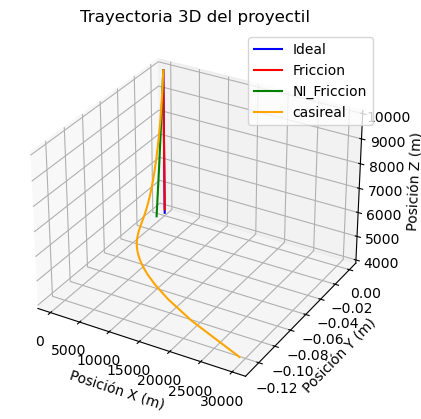

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria en 3D
ax.plot(x_ideal, y_ideal, z_ideal, label='Ideal', color='b')

ax.plot(x_fric, y_fric, z_fric, label='Friccion', color='r')

ax.plot(x_Ni_fric, y_Ni_fric, z_Ni_fric, label='NI_Friccion', color='g')

ax.plot(x_casireal, y_casireal, z_casireal, label='casireal', color='orange')

# Añadir etiquetas y leyenda
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')
ax.set_zlabel('Posición Z (m)')
ax.set_title('Trayectoria 3D del proyectil')
ax.legend()

# Mostrar la gráfica
plt.savefig('prueba.png')

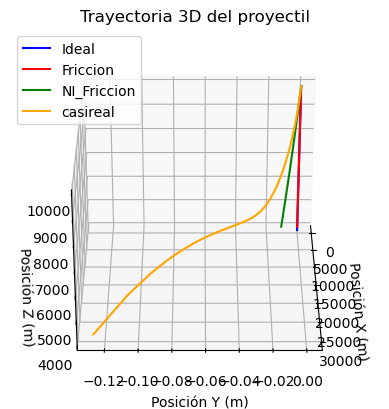

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria en 3D
ax.plot(x_ideal, y_ideal, z_ideal, label='Ideal', color='b')
ax.plot(x_fric, y_fric, z_fric, label='Friccion', color='r')
ax.plot(x_Ni_fric, y_Ni_fric, z_Ni_fric, label='NI_Friccion', color='g')
ax.plot(x_casireal, y_casireal, z_casireal, label='casireal', color='orange')

# Etiquetas
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')
ax.set_zlabel('Posición Z (m)')
ax.set_title('Trayectoria 3D del proyectil')
ax.legend()

# Función de animación para rotar la gráfica
def rotate(angle):
    ax.view_init(azim=angle)

# Crear la animación, rota desde 0 hasta 360 grados
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)


ani.save("proyectil5.gif",writer= "pillow", fps =len(t[t<1]))